**Importing the libraries and loading the data**

If imports are returning errors, run `%pip install [missing import]`

In [ ]:
# some basic libraries
import pandas as pd
import os
import gdown
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import io

# some libraries useful for text pre-processing and text data exploration
import re, string
# %pip install pyLDAvis

# Import necessary libraries
import gensim
import pyLDAvis
import pyLDAvis.gensim_models
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from bs4 import BeautifulSoup
from wordcloud import WordCloud

# some libraries for for model-building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# some libraries for feature extraction from texts
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer #bag of words
from gensim.models import Word2Vec #word embedding


: 

In [2]:
url = 'https://drive.google.com/file/d/1r5xDdeOsuwUDZy_1GVNf_hS8vxQ7LtEV/view?usp=share_link'

# Extract file ID from the URL
file_id = url.split('/')[-2]

# Construct the download URL
dwn_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output = 'complaints.csv'

# Download only if file doesn't already exist
if not os.path.exists(output):
    gdown.download(dwn_url, output, quiet=False)
else:
    print("File already exists. Skipping download.")

# Read the downloaded CSV file into a DataFrame
data = pd.read_csv(output)

data.head()


File already exists. Skipping download.


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-12-25,Credit card or prepaid card,Gift card,Unexpected or other fees,NaN,NaN,NaN,Incomm Holdings Inc.,NY,11576.0,NaN,NaN,Web,2022-12-25,Untimely response,No,NaN,6358716
1,2022-10-17,Credit card or prepaid card,Store credit card,Closing your account,Can't close your account,NaN,NaN,"Bread Financial Holdings, Inc.",PA,19610.0,NaN,NaN,Web,2023-01-03,Closed with explanation,Yes,NaN,6096325
2,2023-01-10,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",PA,19127.0,NaN,NaN,Web,2023-01-10,In progress,Yes,NaN,6413829
3,2022-12-31,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MO,63033.0,NaN,Consent not provided,Web,2022-12-31,Closed with non-monetary relief,Yes,NaN,6382980
4,2022-12-29,Credit card or prepaid card,General-purpose prepaid card,Unexpected or other fees,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,CA,90746.0,NaN,NaN,Web,2022-12-29,Closed with explanation,Yes,NaN,6375967


In [3]:
data['Company'].value_counts() # Counts the number of occurrences of each unique value in the 'Company' column

Company
EQUIFAX, INC.                                    562111
TRANSUNION INTERMEDIATE HOLDINGS, INC.           467190
Experian Information Solutions Inc.              436041
BANK OF AMERICA, NATIONAL ASSOCIATION            121461
WELLS FARGO & COMPANY                            103010
                                                  ...  
Commonwealth Auto Credit, LLC                         1
REVERSE e MORTGAGE LLC Dba CrossPoint Funding         1
Gregg & Gregg, P.C.                                   1
Nationwide TFS, LLC                                   1
BAY VALLEY                                            1
Name: count, Length: 6611, dtype: int64

In [4]:
# Filters the dataset to only include rows where the 'Company' column is exactly 'CITIBANK, N.A.'
citigroup_data = data[data['Company'] == 'CITIBANK, N.A.']

# Displays the first 5 rows of the filtered DataFrame to preview the data
citigroup_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
55,2022-12-30,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Other transaction problem,NaN,A Wire transfer of {$23000.00} was initiated o...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,91730.0,NaN,Consent provided,Web,2022-12-30,Closed with explanation,Yes,NaN,6378719
75,2022-12-26,Checking or savings account,Checking account,Closing an account,Can't close your account,My father passed away on XX/XX/2022. I informe...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",WA,98102.0,NaN,Consent provided,Web,2022-12-26,Closed with explanation,Yes,NaN,6361109
80,2022-12-25,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,"Back in XXXX of 2021, I bought a XXXXXXXX XXXX...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",SC,29072.0,NaN,Consent provided,Web,2022-12-25,Closed with monetary relief,Yes,NaN,6359652
154,2022-12-28,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I am a platinum card holder with Macys. I gene...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",DC,20012.0,NaN,Consent provided,Web,2022-12-28,Closed with explanation,Yes,NaN,6368493
234,2022-12-07,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,I disputed the unknown inquires and the compan...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",MD,20743.0,NaN,Consent provided,Web,2022-12-30,Closed with explanation,Yes,NaN,6286123


Timely response?
Yes    80158
No       369
Name: count, dtype: int64


<Axes: xlabel='Timely response?', ylabel='count'>

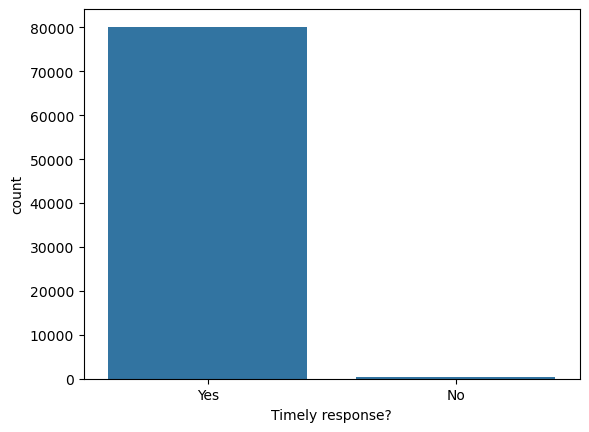

In [5]:
# Counts the number of 'Yes' and 'No' (or other unique values) in the 'Timely response?' column of the Citibank data
x = citigroup_data['Timely response?'].value_counts()

# Prints the count of each response category (e.g., how many timely and untimely responses)
print(x)

# Creates a bar plot to visualize the count of timely responses
sns.barplot(x=x.index, y=x)  # x-axis: response categories ('Yes', 'No'), y-axis: their counts


Consumer disputed?
No     28071
Yes     6697
Name: count, dtype: int64


<Axes: xlabel='Consumer disputed?', ylabel='count'>

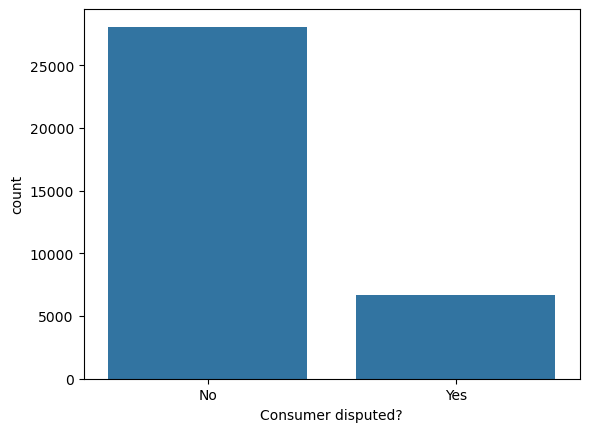

In [6]:
# Counts how many times each unique value (e.g., 'Yes', 'No') appears in the 'Consumer disputed?' column
x = citigroup_data['Consumer disputed?'].value_counts()

# Prints the result — the number of disputed vs. non-disputed complaints
print(x)

# Plots a bar chart showing how often consumers disputed the complaint resolution
sns.barplot(x=x.index, y=x)  # x-axis: dispute categories ('Yes', 'No'), y-axis: number of cases


Product
Credit card or prepaid card                                                     22092
Credit card                                                                     16817
Mortgage                                                                        10249
Checking or savings account                                                      8967
Credit reporting, credit repair services, or other personal consumer reports     7868
Debt collection                                                                  6859
Bank account or service                                                          4450
Money transfer, virtual currency, or money service                                844
Consumer Loan                                                                     765
Student loan                                                                      737
Credit reporting                                                                  267
Payday loan, title loan, or personal loan     

<Axes: title={'center': 'Count of Different Products'}, xlabel='Product', ylabel='count'>

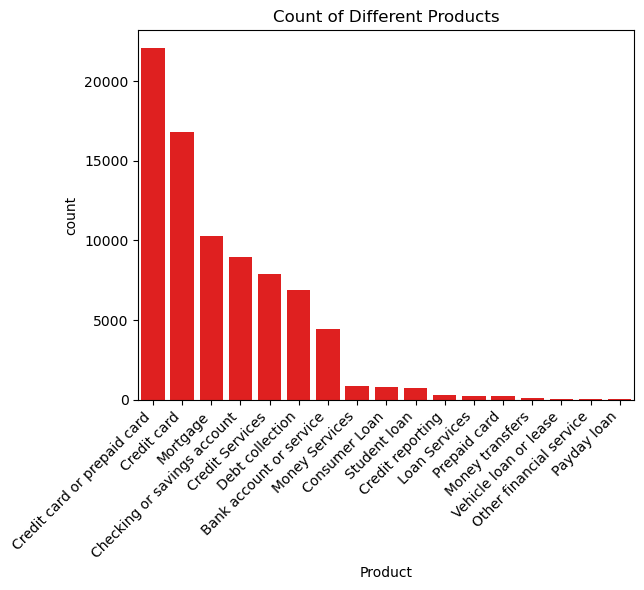

In [7]:
# Count the number of occurrences of each product type in Citibank complaints
x = citigroup_data['Product'].value_counts()

# Print the frequency of each product to the console
print(x)

# Rotate x-axis labels by 45 degrees to avoid overlapping and align them to the right
plt.xticks(rotation=45, ha='right')

# Set a title for the bar chart
plt.title("Count of Different Products", color='black')

# Create a dictionary to rename long or grouped product labels for better readability
new_labels = {
    'Credit reporting, credit repair services, or other personal consumer reports': 'Credit Services',
    'Money transfer, virtual currency, or money service': 'Money Services',
    'Payday loan, title loan, or personal loan': 'Loan Services'
}

# Create a barplot using seaborn to show the count of each product
ax = sns.barplot(x=x.index, y=x)

# Get the current x-axis labels from the plot
current_labels = [item.get_text() for item in ax.get_xticklabels()]

# Replace long labels with simplified versions using the dictionary (if a match exists)
updated_labels = [new_labels.get(label, label) for label in current_labels]

# Apply the updated, shortened labels to the x-axis
ax.set_xticklabels(updated_labels)

# Plot another barplot with red color overlay
sns.barplot(x=x.index, y=x, color='red')  # This creates a second red barplot on top


Consumer consent provided?
Consent provided        29628
Consent not provided    18006
Other                     999
Consent withdrawn         188
Name: count, dtype: int64


<Axes: xlabel='Consumer consent provided?', ylabel='count'>

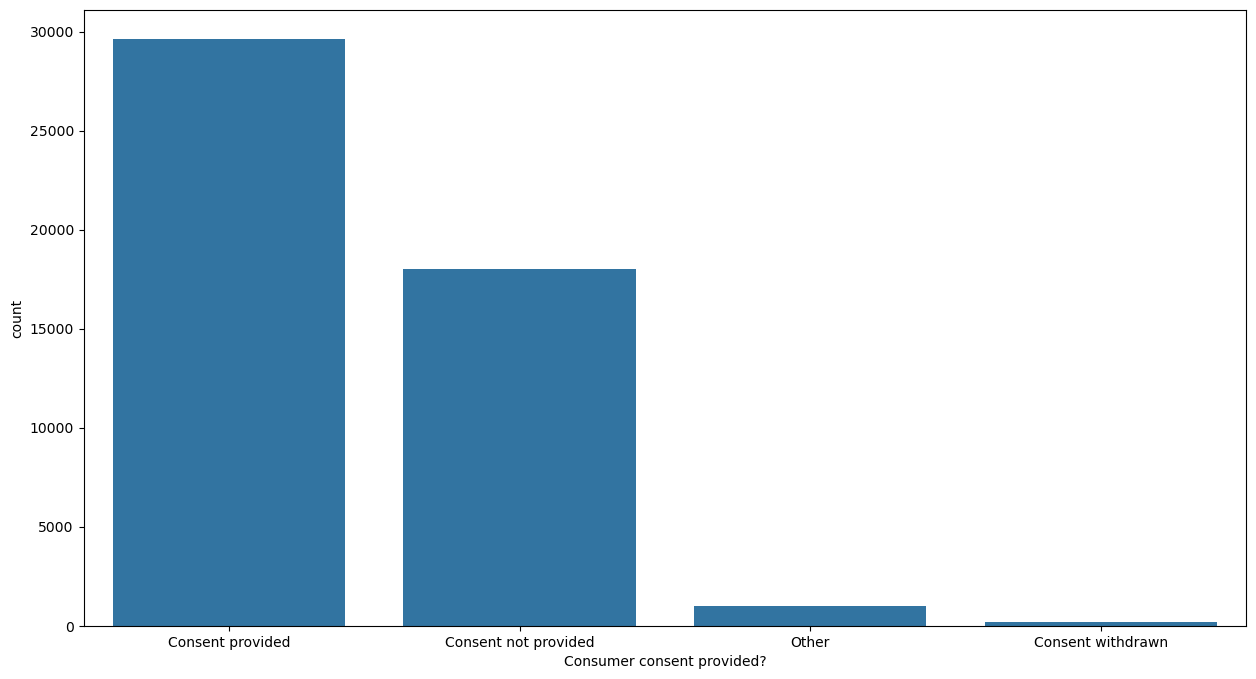

In [8]:
# Count how many times each unique value appears in the 'Consumer consent provided?' column
x = citigroup_data['Consumer consent provided?'].value_counts()

# Print the result to see the exact counts (e.g., 'Yes', 'No', 'N/A')
print(x)

# Set the size of the figure to make the plot larger and more readable (15 inches wide, 8 inches tall)
plt.figure(figsize=(15, 8))

# Create a bar plot to visualize the distribution of consumer consent statuses
sns.barplot(x=x.index, y=x)  # x-axis: categories of consent, y-axis: their counts

In [9]:
# Count the number of complaints sent to the company on each unique date
x = citigroup_data['Date sent to company'].value_counts()

# Print the counts to see how many complaints were sent on each date
print(x)

Date sent to company
2012-06-21    96
2021-12-03    78
2020-06-25    71
2016-06-30    61
2018-04-28    61
              ..
2013-05-05     1
2014-09-07     1
2013-06-02     1
2013-03-30     1
2015-06-21     1
Name: count, Length: 3919, dtype: int64


**Pre text processing**

Stemming

In [10]:
def text_stemming(text):
    # Convert the input to string in case it isn't (to avoid errors)
    text = str(text)

    # Initialize the Porter stemmer from NLTK (used to reduce words to their root form)
    stemmer = nltk.porter.PorterStemmer()

    # Split the text into individual words (tokens), stem each token, then join back into a single string
    stemmed = ' '.join([stemmer.stem(token) for token in text.split()])

    # Return the stemmed version of the text
    return stemmed

#End of Mingyang's Edits (7/15/25)

Task

In [11]:
#Begin Stacy's Edits for 7/16/25
def preProcess(s):
    # task: this function iterates through all the words in a string, 
    # removes all X's and slashes (redacted info), then pieces it back into a sentence
    # hint: regular expression to remove all X's: "[0-9]*[X]*[X]+[/]*[0-9]*"
    j = " ".join([re.sub(r'[0-9]*[X]*[X]+[/]*[0-9]*', '', x) for x in s.split()])

    return j

In [12]:
# converts the contents of 'Consumer complaint narrative' into string (str)
citigroup_data['Consumer complaint narrative'] = citigroup_data['Consumer complaint narrative'].astype(str)

In [13]:
# creates a new column, 'clean_text' with content from 'Consumer complaint narrative' with every response preprocessed
citigroup_data['clean_text'] = citigroup_data['Consumer complaint narrative'].apply(lambda x: preProcess(x))
# This uses a lambda function, in the format lambda argument: expression, where the expression is executed and returns a value


citigroup_data

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,clean_text
55,2022-12-30,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Other transaction problem,NaN,A Wire transfer of {$23000.00} was initiated o...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,91730.0,NaN,Consent provided,Web,2022-12-30,Closed with explanation,Yes,NaN,6378719,A Wire transfer of {$23000.00} was initiated o...
75,2022-12-26,Checking or savings account,Checking account,Closing an account,Can't close your account,My father passed away on XX/XX/2022. I informe...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",WA,98102.0,NaN,Consent provided,Web,2022-12-26,Closed with explanation,Yes,NaN,6361109,My father passed away on . I informed Citi of ...
80,2022-12-25,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,"Back in XXXX of 2021, I bought a XXXXXXXX XXXX...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",SC,29072.0,NaN,Consent provided,Web,2022-12-25,Closed with monetary relief,Yes,NaN,6359652,"Back in of 2021, I bought a . I had to sen..."
154,2022-12-28,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I am a platinum card holder with Macys. I gene...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",DC,20012.0,NaN,Consent provided,Web,2022-12-28,Closed with explanation,Yes,NaN,6368493,I am a platinum card holder with Macys. I gene...
234,2022-12-07,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,I disputed the unknown inquires and the compan...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",MD,20743.0,NaN,Consent provided,Web,2022-12-30,Closed with explanation,Yes,NaN,6286123,I disputed the unknown inquires and the compan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219444,2015-02-06,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,nan,NaN,"CITIBANK, N.A.",AL,35813.0,NaN,NaN,Web,2015-02-06,Closed with explanation,Yes,No,1228172,nan
3219460,2013-02-02,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,nan,NaN,"CITIBANK, N.A.",PA,19086.0,NaN,NaN,Web,2013-02-04,Closed with explanation,Yes,No,289126,nan
3219498,2012-04-02,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,nan,NaN,"CITIBANK, N.A.",MD,21076.0,NaN,NaN,Phone,2012-04-04,Untimely response,No,No,43279,nan
3220559,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,90049.0,NaN,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,No,2138969,Near the end of 2016 I opened a Citigold chec...


Task

In [14]:
# task: create a new column in citigroup_data called 'stemmed_complaints' 
# and fill it in with the content from 'clean_text'
# but stemmed (with text_stemming applied to it)
citigroup_data['stemmed_complaints'] = citigroup_data['clean_text'].apply(text_stemming)

# show the data
citigroup_data

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,clean_text,stemmed_complaints
55,2022-12-30,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Other transaction problem,NaN,A Wire transfer of {$23000.00} was initiated o...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,91730.0,NaN,Consent provided,Web,2022-12-30,Closed with explanation,Yes,NaN,6378719,A Wire transfer of {$23000.00} was initiated o...,a wire transfer of {$23000.00} wa initi onlin ...
75,2022-12-26,Checking or savings account,Checking account,Closing an account,Can't close your account,My father passed away on XX/XX/2022. I informe...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",WA,98102.0,NaN,Consent provided,Web,2022-12-26,Closed with explanation,Yes,NaN,6361109,My father passed away on . I informed Citi of ...,my father pass away on . i inform citi of hi p...
80,2022-12-25,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,"Back in XXXX of 2021, I bought a XXXXXXXX XXXX...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",SC,29072.0,NaN,Consent provided,Web,2022-12-25,Closed with monetary relief,Yes,NaN,6359652,"Back in of 2021, I bought a . I had to sen...","back in of 2021, i bought a . i had to send it..."
154,2022-12-28,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I am a platinum card holder with Macys. I gene...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",DC,20012.0,NaN,Consent provided,Web,2022-12-28,Closed with explanation,Yes,NaN,6368493,I am a platinum card holder with Macys. I gene...,i am a platinum card holder with macys. i gene...
234,2022-12-07,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,I disputed the unknown inquires and the compan...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",MD,20743.0,NaN,Consent provided,Web,2022-12-30,Closed with explanation,Yes,NaN,6286123,I disputed the unknown inquires and the compan...,i disput the unknown inquir and the compani an...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219444,2015-02-06,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,nan,NaN,"CITIBANK, N.A.",AL,35813.0,NaN,NaN,Web,2015-02-06,Closed with explanation,Yes,No,1228172,nan,nan
3219460,2013-02-02,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,nan,NaN,"CITIBANK, N.A.",PA,19086.0,NaN,NaN,Web,2013-02-04,Closed with explanation,Yes,No,289126,nan,nan
3219498,2012-04-02,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,nan,NaN,"CITIBANK, N.A.",MD,21076.0,NaN,NaN,Phone,2012-04-04,Untimely response,No,No,43279,nan,nan
3220559,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,90049.0,NaN,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,No,2138969,Near the end of 2016 I opened a Citigold chec...,near the end of 2016 i open a citigold check a...


# Stop Words

Task

In [15]:
english_stop_words = nltk.corpus.stopwords.words('english')
# some common words might not be in the stop words list. If that ever becomes an issue, you can list a few of them and 
# add them into english_stop_words
def remove_stop_words(text):
    for stopword in english_stop_words:
        word = ' ' + stopword + ' '
        start_date = "" + stopword + "/"
        date = '/' + stopword
        # Task: remove word, start_date, and date everytime they appear in text
        text = text.replace(word, ' ')
        text = text.replace(start_date, '')
        text = text.replace(date, ' ')
    return text

In [16]:
print(english_stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Task

In [17]:
# a new dataframe, info, is created which contains two columns from citigroup_data
info = citigroup_data[['Consumer complaint narrative', 'Company public response']]

# task: create a new column in citigroup_data called 'lowercase_stopworded_complaints',
# which contains content from 'stemmed_complaints' with stop words removed (remove_stop_words)
citigroup_data['lowercase_stopworded_complaints'] = citigroup_data['stemmed_complaints'].apply(remove_stop_words)

citigroup_data

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,clean_text,stemmed_complaints,lowercase_stopworded_complaints
55,2022-12-30,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Other transaction problem,NaN,A Wire transfer of {$23000.00} was initiated o...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,91730.0,...,Consent provided,Web,2022-12-30,Closed with explanation,Yes,NaN,6378719,A Wire transfer of {$23000.00} was initiated o...,a wire transfer of {$23000.00} wa initi onlin ...,"a wire transfer {$23000.00} wa initi onlin , c..."
75,2022-12-26,Checking or savings account,Checking account,Closing an account,Can't close your account,My father passed away on XX/XX/2022. I informe...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",WA,98102.0,...,Consent provided,Web,2022-12-26,Closed with explanation,Yes,NaN,6361109,My father passed away on . I informed Citi of ...,my father pass away on . i inform citi of hi p...,my father pass away . inform citi hi pass tele...
80,2022-12-25,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,"Back in XXXX of 2021, I bought a XXXXXXXX XXXX...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",SC,29072.0,...,Consent provided,Web,2022-12-25,Closed with monetary relief,Yes,NaN,6359652,"Back in of 2021, I bought a . I had to sen...","back in of 2021, i bought a . i had to send it...","back 2021, bought . send back twice within 2 m..."
154,2022-12-28,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I am a platinum card holder with Macys. I gene...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",DC,20012.0,...,Consent provided,Web,2022-12-28,Closed with explanation,Yes,NaN,6368493,I am a platinum card holder with Macys. I gene...,i am a platinum card holder with macys. i gene...,i platinum card holder macys. gener buy produc...
234,2022-12-07,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,I disputed the unknown inquires and the compan...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",MD,20743.0,...,Consent provided,Web,2022-12-30,Closed with explanation,Yes,NaN,6286123,I disputed the unknown inquires and the compan...,i disput the unknown inquir and the compani an...,i disput unknown inquir compani credit bureau ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219444,2015-02-06,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,nan,NaN,"CITIBANK, N.A.",AL,35813.0,...,NaN,Web,2015-02-06,Closed with explanation,Yes,No,1228172,nan,nan,nan
3219460,2013-02-02,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,nan,NaN,"CITIBANK, N.A.",PA,19086.0,...,NaN,Web,2013-02-04,Closed with explanation,Yes,No,289126,nan,nan,nan
3219498,2012-04-02,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,nan,NaN,"CITIBANK, N.A.",MD,21076.0,...,NaN,Phone,2012-04-04,Untimely response,No,No,43279,nan,nan,nan
3220559,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,90049.0,...,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,No,2138969,Near the end of 2016 I opened a Citigold chec...,near the end of 2016 i open a citigold check a...,near end 2016 open citig

In [18]:
# creates a new dataframe that contains rows from citigroup_data where content in 'lowercase_stopworded_complaints' is
# not 'nan' (undefined)
citigroup_data1 = citigroup_data[~citigroup_data['lowercase_stopworded_complaints'].isin(['nan'])]
citigroup_data1

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,clean_text,stemmed_complaints,lowercase_stopworded_complaints
55,2022-12-30,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Other transaction problem,NaN,A Wire transfer of {$23000.00} was initiated o...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,91730.0,...,Consent provided,Web,2022-12-30,Closed with explanation,Yes,NaN,6378719,A Wire transfer of {$23000.00} was initiated o...,a wire transfer of {$23000.00} wa initi onlin ...,"a wire transfer {$23000.00} wa initi onlin , c..."
75,2022-12-26,Checking or savings account,Checking account,Closing an account,Can't close your account,My father passed away on XX/XX/2022. I informe...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",WA,98102.0,...,Consent provided,Web,2022-12-26,Closed with explanation,Yes,NaN,6361109,My father passed away on . I informed Citi of ...,my father pass away on . i inform citi of hi p...,my father pass away . inform citi hi pass tele...
80,2022-12-25,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,"Back in XXXX of 2021, I bought a XXXXXXXX XXXX...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",SC,29072.0,...,Consent provided,Web,2022-12-25,Closed with monetary relief,Yes,NaN,6359652,"Back in of 2021, I bought a . I had to sen...","back in of 2021, i bought a . i had to send it...","back 2021, bought . send back twice within 2 m..."
154,2022-12-28,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I am a platinum card holder with Macys. I gene...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",DC,20012.0,...,Consent provided,Web,2022-12-28,Closed with explanation,Yes,NaN,6368493,I am a platinum card holder with Macys. I gene...,i am a platinum card holder with macys. i gene...,i platinum card holder macys. gener buy produc...
234,2022-12-07,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,I disputed the unknown inquires and the compan...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",MD,20743.0,...,Consent provided,Web,2022-12-30,Closed with explanation,Yes,NaN,6286123,I disputed the unknown inquires and the compan...,i disput the unknown inquir and the compani an...,i disput unknown inquir compani credit bureau ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219098,2016-08-11,Debt collection,Credit card,Communication tactics,Called after sent written cease of comm,I sent a letter asking for debt verification a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,92506.0,...,Consent provided,Web,2016-08-11,Closed with explanation,Yes,No,2058119,I sent a letter asking for debt verification a...,i sent a letter ask for debt verif and to be p...,i sent letter ask debt verif place call list. ...
3219099,2017-03-27,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,I spoke with a representative @ CitiMortgage o...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",GA,30326.0,...,Consent provided,Web,2017-03-27,Closed with explanation,Yes,No,2406658,I spoke with a representative @ CitiMortgage o...,i spoke with a repres @ citimortgag on who adv...,i spoke repres @ citimortgag advis addit docum...
3219100,2015-05-09,Credit card,NaN,Late fee,NaN,Purchased XXXX bras and opened a macy 's card....,Company chooses not to provide a public response,"CITIBANK, N.A.",

# TF-IDF!

Task

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# new dataframe: documents
documents = citigroup_data1

vectorizer = TfidfVectorizer()
# the vectorizer is fed the dataframe containing pre-processed complaints, and outputs a matrix:
# the rows are document entries, the cols are individual words. Each element is a number (TF-IDF scores)
tfidf_matrix = vectorizer.fit_transform(documents)

# feature_names stores all unique words from document
feature_names = vectorizer.get_feature_names_out()

# empty dictionary. Will be populated with words and their corresponding TF-IDF scores, as long as they are non-zero
tfidf_values = {}

# populating the dictionary
# this for loop iterates through each row in documents, storing the entry from each index into doc
for doc_index, doc in enumerate(documents):
    # in each row of the matrix, returns the indices where the TF-IDF score is non-zero, then pulls out the column indices
    feature = tfidf_matrix[doc_index, :].nonzero()[1]

    # print(tfidf_matrix[doc_index, :].nonzero())
    
    # zip essentially distributes each element of each list into tuples; here it distributes the index of each word
    # with its corresponding TFIDF score
    tfidf_doc_values = zip(feature, [tfidf_matrix[doc_index, x] for x in feature])
    # adding to the dictionary: the key is the actual word, and the value is the tfidf score
    tfidf_values[doc_index] = {feature_names[i]: value for i, value in tfidf_doc_values}

# Task: try to print out the values in the dictionary (tfidf_values) on your own. 
# f-notation recommended, and using for loops.
# the final print should look something like:
# Document 1:
# date: 0.6609119307285228
# received: 0.7504634700108301


# Document 2:
# product: 1.0


# Document 3:
# product: 0.7071067811865476
# sub: 0.7071067811865476
#...

for doc_index, values in tfidf_values.items():
    print(f'Document {doc_index + 1}:')
    for word, tfidf_value in values.items():
        print(f'{word}: {tfidf_value}')
    print('\n')

# End of Stacy's Tutorial (7/16/25)

Document 1:
date: 0.6609119307285228
received: 0.7504634700108301


Document 2:
product: 1.0


Document 3:
product: 0.7071067811865476
sub: 0.7071067811865476


Document 4:
issue: 1.0


Document 5:
sub: 0.7071067811865476
issue: 0.7071067811865476


Document 6:
consumer: 0.4806325278434814
complaint: 0.5795682796077143
narrative: 0.65809800368284


Document 7:
company: 0.49612531832533124
public: 0.6793112464346958
response: 0.5407364413315685


Document 8:
company: 1.0


Document 9:
state: 1.0


Document 10:
zip: 0.7071067811865475
code: 0.7071067811865475


Document 11:
tags: 1.0


Document 12:
consumer: 0.4588508368236594
consent: 0.6282737896595033
provided: 0.6282737896595033


Document 13:
submitted: 0.7071067811865475
via: 0.7071067811865475


Document 14:
date: 0.5014385652506749
company: 0.4158400203299057
sent: 0.5693819526914362
to: 0.5014385652506749


Document 15:
consumer: 0.46413905285900786
company: 0.46413905285900786
response: 0.5058740008938791
to: 0.5596797070127751

In [21]:
# Begin Mingyang's Edit for 7/17/25 
  
# Displays our current Data Frame that we declared before
documents

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,clean_text,stemmed_complaints,lowercase_stopworded_complaints
55,2022-12-30,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Other transaction problem,NaN,A Wire transfer of {$23000.00} was initiated o...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,91730.0,...,Consent provided,Web,2022-12-30,Closed with explanation,Yes,NaN,6378719,A Wire transfer of {$23000.00} was initiated o...,a wire transfer of {$23000.00} wa initi onlin ...,"a wire transfer {$23000.00} wa initi onlin , c..."
75,2022-12-26,Checking or savings account,Checking account,Closing an account,Can't close your account,My father passed away on XX/XX/2022. I informe...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",WA,98102.0,...,Consent provided,Web,2022-12-26,Closed with explanation,Yes,NaN,6361109,My father passed away on . I informed Citi of ...,my father pass away on . i inform citi of hi p...,my father pass away . inform citi hi pass tele...
80,2022-12-25,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,"Back in XXXX of 2021, I bought a XXXXXXXX XXXX...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",SC,29072.0,...,Consent provided,Web,2022-12-25,Closed with monetary relief,Yes,NaN,6359652,"Back in of 2021, I bought a . I had to sen...","back in of 2021, i bought a . i had to send it...","back 2021, bought . send back twice within 2 m..."
154,2022-12-28,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I am a platinum card holder with Macys. I gene...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",DC,20012.0,...,Consent provided,Web,2022-12-28,Closed with explanation,Yes,NaN,6368493,I am a platinum card holder with Macys. I gene...,i am a platinum card holder with macys. i gene...,i platinum card holder macys. gener buy produc...
234,2022-12-07,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,I disputed the unknown inquires and the compan...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",MD,20743.0,...,Consent provided,Web,2022-12-30,Closed with explanation,Yes,NaN,6286123,I disputed the unknown inquires and the compan...,i disput the unknown inquir and the compani an...,i disput unknown inquir compani credit bureau ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219098,2016-08-11,Debt collection,Credit card,Communication tactics,Called after sent written cease of comm,I sent a letter asking for debt verification a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,92506.0,...,Consent provided,Web,2016-08-11,Closed with explanation,Yes,No,2058119,I sent a letter asking for debt verification a...,i sent a letter ask for debt verif and to be p...,i sent letter ask debt verif place call list. ...
3219099,2017-03-27,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,I spoke with a representative @ CitiMortgage o...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",GA,30326.0,...,Consent provided,Web,2017-03-27,Closed with explanation,Yes,No,2406658,I spoke with a representative @ CitiMortgage o...,i spoke with a repres @ citimortgag on who adv...,i spoke repres @ citimortgag advis addit docum...
3219100,2015-05-09,Credit card,NaN,Late fee,NaN,Purchased XXXX bras and opened a macy 's card....,Company chooses not to provide a public response,"CITIBANK, N.A.",

In [20]:
# Importing Gensim's Dictionary object used for mapping words to IDs
from gensim import corpora

# Print out the available columns in the DataFrame to confirm structure
print("Column names in the DataFrame:", citigroup_data.columns)

# Specify the column that contains preprocessed complaint text
text_column_name = 'lowercase_stopworded_complaints'

# Check that this column actually exists; raise an error if it doesn't
if text_column_name not in citigroup_data.columns:
    raise ValueError(f"Column '{text_column_name}' not found in the DataFrame")

# Convert the entire column to a list of strings (each representing one complaint)
texts = citigroup_data[text_column_name].tolist()

# Validate that the list is not empty
if not texts:
    # Brings up an error that says "No data found in the text column"
    raise ValueError("No data found in the text column")

# Initialize an empty list to store tokenized sentences
tokenized = []

# Loop over each sentence in the list
for sentence in texts:
    # Use gensim's built-in tokenizer to split sentences into tokens, lowercasing everything, removing punctuation, and removing accent marks (deacc=True) 
    # deacc=True : treating words like "résumé" and "resume" as the same
    tokenized.append(gensim.utils.simple_preprocess(sentence, deacc=True))

# Show a preview of the tokenized text to verify everything is working
print("First few tokenized sentences:", tokenized[:5])

# Create a dictionary: assigns a unique integer ID to each word in the corpus
dictionary = corpora.Dictionary(tokenized)

# Create the corpus: for each document, generate a list of tuples (word_id, word_frequency)
# .doc2bow converts a document into bag of words format: a list of (word_id, word_frequency)
# example: the dictionary is this {'bank': 0, 'charged': 1, 'me': 2, 'extra': 3, 'fees': 4, 'unauthorized': 5}

# Apply the doc2bow mehtod to each text in the tokenized list
corpus = [dictionary.doc2bow(text) for text in tokenized]
# After doc2bow, the output will be [(0, 1), (1, 1), (4, 2)]

Column names in the DataFrame: Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'clean_text',
       'stemmed_complaints', 'lowercase_stopworded_complaints'],
      dtype='object')
First few tokenized sentences: [['wire', 'transfer', 'wa', 'initi', 'onlin', 'corpor', 'account', 'anoth', 'corpor', 'account', 'name', 'wire', 'transfer', 'wa', 'unsuccess', 'ofac', 'wa', 'cite', 'reason', 'supervisor', 'citibank', 'wire', 'department', 'avail', 'inform', 'request', 'ha', 'provided', 'subsequ', 'cancel', 'wire', 'transfer', 'date', 'fund', 'return', 'reason', 'abl', 'provid', 'ownership', 'detail', 'neither', 'oblig', 'expect', 'know', 'ownership', 'detail', 'valid', 'reason', 'citiban

In [23]:
# Import the TF-IDF model for weighting words based on frequency and uniqueness
from gensim.models import TfidfModel

# Create a TF-IDF model using the bag-of-words corpus
# This model will learn the importance (weight) of each word across the entire set of documents and calculating IDF scores for all words in the corpus
tfidf = TfidfModel(corpus)

# Apply the trained TF-IDF model to the original corpus
corpus_tfidf = tfidf[corpus]
# Iterates over each document in the BoW corpus
# Calculates the TF-IDF score for each (word_id, count) in that document.
# Returns a list of (word_id, tf-idf_score) for every document.

# Ex:
# BoWs: [(0, 1), (1, 2), (3, 1)]
# to TF-IDF: [(0, 0.32), (1, 0.50), (3, 0.76)]

In [22]:
# Print the first few entries of the dictionary and corpus to verify
print("Dictionary:", dictionary.token2id) # Maps each unique word (token) to an unique id
print("Corpus:", corpus[0])

Dictionary: {'abl': 0, 'account': 1, 'anoth': 2, 'avail': 3, 'cancel': 4, 'cite': 5, 'citibank': 6, 'corpor': 7, 'date': 8, 'department': 9, 'detail': 10, 'expect': 11, 'fund': 12, 'ha': 13, 'inform': 14, 'initi': 15, 'know': 16, 'name': 17, 'neither': 18, 'oblig': 19, 'ofac': 20, 'onlin': 21, 'ownership': 22, 'provid': 23, 'provided': 24, 'reason': 25, 'request': 26, 'requir': 27, 'return': 28, 'subsequ': 29, 'supervisor': 30, 'transfer': 31, 'unsuccess': 32, 'urgent': 33, 'valid': 34, 'wa': 35, 'wire': 36, 'withhold': 37, 'abov': 38, 'accounts': 39, 'action': 40, 'alleg': 41, 'amount': 42, 'ani': 43, 'away': 44, 'call': 45, 'certificate': 46, 'cfr': 47, 'charg': 48, 'check': 49, 'citi': 50, 'close': 51, 'closed': 52, 'confirm': 53, 'contact': 54, 'continu': 55, 'day': 56, 'death': 57, 'despit': 58, 'did': 59, 'died': 60, 'documents': 61, 'end': 62, 'fals': 63, 'father': 64, 'fax': 65, 'fee': 66, 'form': 67, 'frozen': 68, 'hi': 69, 'includ': 70, 'indic': 71, 'instruct': 72, 'intent': 

In [24]:
from gensim.models import LdaModel

# Create the LDA (Latent Dirichlet Allocation) topic model
# - corpus: the bag-of-words representation of documents
# - num_topics: number of topics we want the model to discover. The number can be tricky to find, usually through experimentation and trial and error
# example of topics: 
    # "I was charged extra fees on my mortgage" 
    # "Unauthorized credit card transaction"
    # Topic 0: 'mortgage', 'fees', 'rate'
    # Topic 1: 'unauthorized', 'credit', 'fraud'
# LDA doesn't need a specific word to appear in every document in a topic.
# It finds patterns across many documents and identifies which words tend to appear together frequently.
# - id2word: the dictionary mapping of word IDs to actual words
# - passes: number of times the model will go through the entire corpus (higher = better quality but slower)
lda = LdaModel(corpus, num_topics=4, id2word=dictionary, passes=10)

# Another way to determine the number of topics is by using coherence score, it measures how understandable and meaningful the topics are.
from gensim.models import CoherenceModel
coherence_model = CoherenceModel(model=lda, texts=tokenized, dictionary=dictionary, coherence='c_v')
coherence = coherence_model.get_coherence()
print("Coherence Score:", coherence)
# Higher scores (closer to 1.0) = more interpretable topics
# Try this for different topic numbers and pick the best one


# Loop through each generated topic and print the top words associated with it
# lda.print_topics(-1) returns all topics with their most relevant words
for idx, word in lda.print_topics(-1):
    print(f"Topic: {idx}\nWords: {word}\n")



Coherence Score: 0.4926196072502911
Topic: 0
Words: 0.050*"credit" + 0.036*"report" + 0.030*"thi" + 0.022*"account" + 0.013*"maci" + 0.012*"inform" + 0.012*"debt" + 0.011*"ani" + 0.010*"ha" + 0.009*"consum"

Topic: 1
Words: 0.037*"account" + 0.034*"wa" + 0.029*"payment" + 0.018*"citi" + 0.016*"thi" + 0.013*"card" + 0.013*"balanc" + 0.012*"citibank" + 0.012*"receiv" + 0.012*"would"

Topic: 2
Words: 0.614*"nan" + 0.052*"loan" + 0.036*"mortgag" + 0.020*"citimortgag" + 0.011*"modif" + 0.009*"properti" + 0.008*"foreclosur" + 0.008*"apprais" + 0.007*"borrow" + 0.005*"hous"

Topic: 3
Words: 0.037*"wa" + 0.018*"call" + 0.017*"card" + 0.016*"thi" + 0.014*"account" + 0.013*"citi" + 0.012*"citibank" + 0.009*"would" + 0.009*"told" + 0.009*"bank"



In [25]:
from IPython.display import display, HTML  # Tools to display HTML content directly in a Jupyter Notebook

# Use pyLDAvis to create an interactive topic visualization
# - lda: the trained LDA model
# - corpus: the BoW representation of your documents
# - dictionary: the word-to-ID mapping
# - sort_topics=False keeps the original topic order
#  Prepares the topic model and data for interactive visualization 
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=False)

# Save the interactive visualization as an HTML file locally
pyLDAvis.save_html(lda_display, 'lda.html')

# Display the saved HTML file directly in the notebook
display(HTML('lda.html'))

# Circles: 
# Each circle = a topic
# (Size = how dominant the topic is across all documents)

# Bar charts: 
# Top words in a topic, showing both:
    # Frequency
    # Relevance (more informative words)
        # λ = 1 → Sort words purely by frequency within the topic (i.e., show the most common words).
        # λ = 0 → Sort words by how unique they are to the topic (i.e., most distinctive words).
        # λ = 0.6 (default) → A balanced mix of both.


In [ ]:
# Define the two columns we want to extract from the DataFrame:
# - 'Product': the category of the complaint
# - 'lowercase_stopworded_complaints': the cleaned complaint text
col = ['Product','lowercase_stopworded_complaints']

# Create a new DataFrame using only the selected columns
plswork = citigroup_data[col]

# Rename the columns to simpler, more convenient names:
# - 'Product' becomes 'product'    
# - 'lowercase_stopworded_complaints' becomes 'text'
plswork.columns = ['product', 'text']
# OR:
# plswork.rename(columns={'Product': 'product', 'lowercase_stopworded_complaints': 'text'}, inplace=True)

# Show the first 5 rows of the new DataFrame to verify the structure
plswork.head()


,product,text
55,"Money transfer, virtual currency, or money ser...","a wire transfer {$23000.00} wa initi onlin , c..."
75,Checking or savings account,my father pass away . inform citi hi pass tele...
80,Credit card or prepaid card,"back 2021, bought . send back twice within 2 m..."
154,Credit card or prepaid card,i platinum card holder macys. gener buy produc...
234,"Credit reporting, credit repair services, or o...",i disput unknown inquir compani credit bureau ...
